In [216]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification,roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_squared_error,roc_auc_score,roc_curve,auc, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
from sklearn import preprocessing
import seaborn as sns
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.externals import joblib 
from sklearn.preprocessing import LabelBinarizer,label_binarize
import itertools 
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/CNN _ADABoost/Data_new.csv')

In [219]:
data.head()

,de1,de2,de3,de4,an1,an2,an3,an4,sl1,sl2,sl3,sl4,Class
0,2,1,1,1,2,1,1,0,0,1,1,1,1.0
1,2,0,1,2,1,1,0,1,0,1,0,0,1.0
2,1,1,0,3,1,1,1,0,0,1,1,1,2.0
3,2,2,3,3,3,2,1,2,1,3,2,2,2.0
4,0,1,1,2,1,0,1,0,0,3,3,3,2.0


In [220]:
data.shape

(776, 13)

In [221]:
col =data.columns
col

Index(['de1', 'de2', 'de3', 'de4', 'an1', 'an2', 'an3', 'an4', 'sl1', 'sl2',
       'sl3', 'sl4', 'Class'],
      dtype='object')

In [0]:
data=data.dropna()

In [223]:
data.isnull().sum()

de1      0
de2      0
de3      0
de4      0
an1      0
an2      0
an3      0
an4      0
sl1      0
sl2      0
sl3      0
sl4      0
Class    0
dtype: int64

In [224]:
data.shape

(775, 13)

In [0]:
X = data.drop(['Class'],1)

In [0]:
y = data['Class']

In [0]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3,random_state=42)

In [233]:
X_train.shape,y_train.shape

((542, 12), (542,))

In [0]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
def CNN_Model(X_train, X_test, y_train, y_test):
      X_train=X_train.to_numpy()
      X_test=X_test.to_numpy()
      num_classes = 3
      batch_size = 64
      epochs = 10
      X_train = X_train.reshape(X_train.shape[0], 12, 1).astype('float32')
      X_test = X_test.reshape(X_test.shape[0], 12, 1).astype('float32') 
      y_train1 = np_utils.to_categorical(y_train)
      y_test1 = np_utils.to_categorical(y_test)

      model = Sequential()
      model.add(Conv1D(filters=32, kernel_size=3, input_shape=(12, 1)))
      model.add(MaxPooling1D(pool_size=3 ))
      model.add(Flatten())
      model.add(Dense(512, activation='relu'))
      model.add(Dense(num_classes, activation='softmax'))
      model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
      checkpoint = ModelCheckpoint("/content/gdrive/My Drive/CNN _ADABoost/CNN_Model.h5",
                                 monitor="val_loss",
                                 mode="min",
                                 save_best_only = True,
                                 verbose=1)
      earlystop = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0, 
                              patience = 10, 
                              verbose = 1,
                              restore_best_weights = True) 
      callbacks = [earlystop, checkpoint]
      history = model.fit(X_train, y_train1,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = callbacks,
              validation_data=(X_test, y_test1),
              shuffle=True)
      score = model.evaluate(X_test, y_test1, verbose=0)
      print('Test loss:', score[0])
      print('Test accuracy:', score[1])
      history_dict = history.history
      loss_values = history_dict['loss']
      val_loss_values = history_dict['val_loss']
      epochs = range(1, len(loss_values) + 1)
      line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
      line2 = plt.plot(epochs, loss_values, label='Training Loss')
      plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
      plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
      plt.xlabel('Epochs') 
      plt.ylabel('Loss')
      plt.grid(True)
      plt.legend()
      plt.show()
      history_dict = history.history
      acc_values = history_dict['acc']
      val_acc_values = history_dict['val_acc']
      epochs = range(1, len(loss_values) + 1)
      line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
      line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
      plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
      plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
      plt.xlabel('Epochs') 
      plt.ylabel('Accuracy')
      plt.grid(True)
      plt.legend()
      plt.show()

      #Confusion Matrix
      y_pred = model.predict_classes(X_test)
      cnf_matrix = confusion_matrix(y_test, y_pred)
      np.set_printoptions(precision=2)
      plt.figure()
      plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High'],
                        title='Confusion matrix, without normalization')
      plt.show()
      
      #AUC_ROC curve
      auc1 = multiclass_roc_auc_score(y_test,y_pred)
      print('AUC for CNN:',auc1)
      y_score = model.predict_proba(X_test)
      n_classes=3
      fpr = dict()
      tpr = dict()
      roc_auc = dict()
      y_test1 = label_binarize(y_test, classes=[0, 1, 2])
      for i in range(n_classes):
          fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
          roc_auc[i] = auc(fpr[i], tpr[i])
      colors = list(['blue', 'red', 'green'])
      for i, color in zip(range(n_classes), colors):
          plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([-0.05, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('ROC-AUC curve')
      plt.legend(loc="lower right")
      plt.show()
      
      #Classification Report
      print("Classification Report : ")
      target_names = ['Low', 'Medium', 'High']
      print(classification_report(y_test, y_pred, target_names=target_names))

Train on 542 samples, validate on 233 samples
Epoch 1/10
542/542 [==============================] - 25s 46ms/step - loss: 1.0085 - acc: 0.4299 - val_loss: 0.9264 - val_acc: 0.5794

Epoch 00001: val_loss improved from inf to 0.92642, saving model to /content/gdrive/My Drive/CNN _ADABoost/CNN_Model.h5
Epoch 2/10
542/542 [==============================] - 0s 196us/step - loss: 0.8668 - acc: 0.5830 - val_loss: 0.8594 - val_acc: 0.6180

Epoch 00002: val_loss improved from 0.92642 to 0.85938, saving model to /content/gdrive/My Drive/CNN _ADABoost/CNN_Model.h5
Epoch 3/10
542/542 [==============================] - 0s 181us/step - loss: 0.8075 - acc: 0.6199 - val_loss: 0.7921 - val_acc: 0.6395

Epoch 00003: val_loss improved from 0.85938 to 0.79209, saving model to /content/gdrive/My Drive/CNN _ADABoost/CNN_Model.h5
Epoch 4/10
542/542 [==============================] - 0s 183us/step - loss: 0.7532 - acc: 0.6402 - val_loss: 0.7912 - val_acc: 0.6094

Epoch 00004: val_loss improved from 0.79209 to

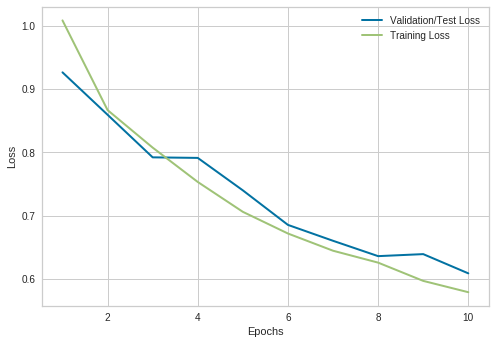

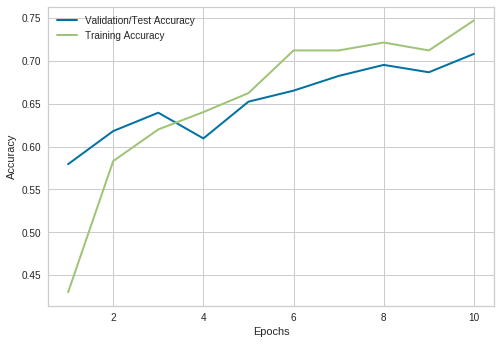

Confusion matrix, without normalization
[[63 20  0]
 [21 69  4]
 [ 0 23 33]]


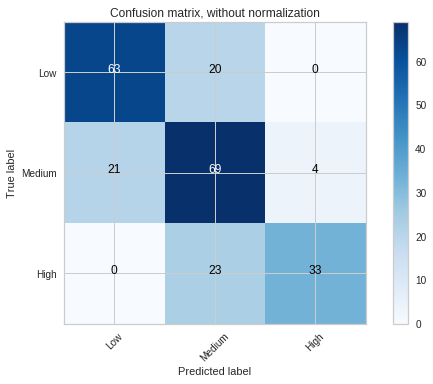

AUC for CNN: 0.7684021706689014


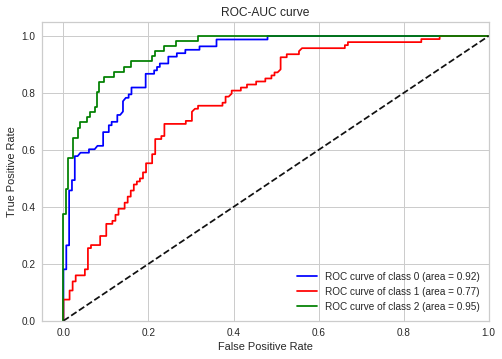

Classification Report : 
              precision    recall  f1-score   support

         Low       0.75      0.76      0.75        83
      Medium       0.62      0.73      0.67        94
        High       0.89      0.59      0.71        56

    accuracy                           0.71       233
   macro avg       0.75      0.69      0.71       233
weighted avg       0.73      0.71      0.71       233



In [237]:
CNN_Model(X_train, X_test, y_train, y_test)

In [0]:
ada = AdaBoostClassifier(RandomForestClassifier(),random_state=42)
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
clf = tree.DecisionTreeClassifier()
gnb = GaussianNB()
xgb=XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=50, gamma=0,min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,random_state=42,  )
rf2=RandomForestClassifier(bootstrap=True,max_depth= 80,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100,random_state=42)
def stacking(X_train,y_train,X_test,y_test):
  classifiers=[knn_best,rf2]
  sc = StackingClassifier(classifiers,meta_classifier=ada)  
  sc.fit(X_train,y_train)
  joblib.dump(sc, '/content/gdrive/My Drive/CNN _ADABoost/stacking.pkl') 
  print("Stacking Classifier :train set")
  y_pred = sc.predict(X_train)
     
  print("Stacking Classifier :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("Stacking Classifier :Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("Stacking Classifier :Test set")
  y_pred = sc.predict(X_test)
  print ("Stacking Classifier :Accuracy : ", accuracy_score(y_test,y_pred)*100)
  
  #Confusion Matrix
  y_pred = sc.predict(X_test)
  cnf_matrix = confusion_matrix(y_test, y_pred)
  np.set_printoptions(precision=2)
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High'],
                        title='Confusion matrix, without normalization')
  plt.show()
  
  #ROC_AUC curve
  auc1 = multiclass_roc_auc_score(y_test,y_pred)
  print('AUC for Stacking:',auc1)
  y_score = sc.predict_proba(X_test)
  n_classes=3
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  y_test1 = label_binarize(y_test, classes=[0, 1, 2])
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  colors = list(['blue', 'red', 'green'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-AUC curve')
  plt.legend(loc="lower right")
  plt.show()  
  
  #Classification Report
  target_names =['Low', 'Medium', 'High']
  prediction=sc.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  #classes = ['Low', 'Medium', 'High']
  #visualizer = ClassificationReport(sc, classes=classes, support=True)
  #visualizer.fit(X_train, y_train)  
  #visualizer.score(X_test, y_test)  
  #g = visualizer.poof()

Stacking Classifier :train set
Stacking Classifier :Confusion Matrix:  [[166   9   0]
 [ 23 188   4]
 [  1   8 143]]
Stacking Classifier :Accuracy :  91.69741697416974
Stacking Classifier :Test set
Stacking Classifier :Accuracy :  78.96995708154506
Confusion matrix, without normalization
[[68 15  0]
 [18 72  4]
 [ 0 12 44]]


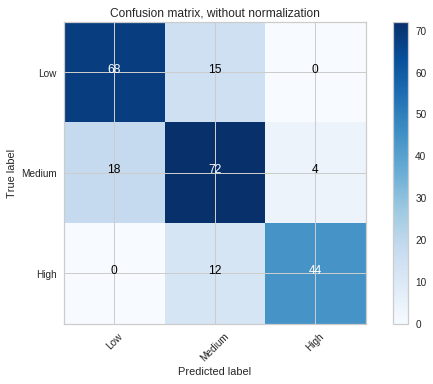

AUC for Stacking: 0.8390175610972479


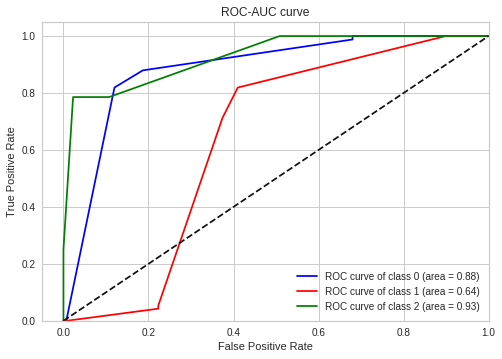

              precision    recall  f1-score   support

         Low       0.79      0.82      0.80        83
      Medium       0.73      0.77      0.75        94
        High       0.92      0.79      0.85        56

    accuracy                           0.79       233
   macro avg       0.81      0.79      0.80       233
weighted avg       0.80      0.79      0.79       233



In [240]:
stacking(X_train,y_train,X_test,y_test)

In [0]:
def new_model():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=3, input_shape=(12,1)))
  model.add(MaxPooling1D(pool_size=3))
  model.add(Flatten())
  model.add(Dense(1500, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return model

In [0]:
def AdaBoost(X_train,y_train,X_test,y_test):
  cnn_estimator = KerasClassifier(build_fn=new_model, epochs=50, batch_size=32, verbose=0)
  ada = AdaBoostClassifier(base_estimator= cnn_estimator,learning_rate= 0.05, random_state=42)
  X_train=X_train.to_numpy()
  X_test=X_test.to_numpy()
  X_train = X_train.reshape(X_train.shape[0], 12, 1).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], 12, 1).astype('float32')
  #encoder = LabelEncoder()
  #encoder.fit(y_train)
  #encoded_y_train = encoder.transform(y_train)
  #encoder.fit(y_test)
  #encoded_y_test = encoder.transform(y_test)
  #y_train = np_utils.to_categorical(y_train)
  #y_test1 = np_utils.to_categorical(encoded_y_test)
  ada.fit(X_train,y_train)
  joblib.dump(ada, '/content/gdrive/My Drive/CNN _ADABoost/AdaBoost.pkl')
  print("Ada Boost:train set")
  print("Hello")
  y_pred = ada.predict(X_train)
  pred=ada.predict_proba(X_test)   
  print("Ada Boost:Confusion Matrix: ", confusion_matrix(y_train, y_pred))
  print ("Ada Boost:Accuracy : ", accuracy_score(y_train,y_pred)*100)
  print("Ada Boost:Test set")
  y_pred = ada.predict(X_test)
  print("Ada Boost:Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  print ("Ada Boost:Accuracy : ", accuracy_score(y_test,y_pred)*100)
  
  #confusion Matrix
  y_pred = ada.predict(X_test)
  cnf_matrix = confusion_matrix(y_test, y_pred)
  np.set_printoptions(precision=2)
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High'],
                        title='Confusion matrix, without normalization')
  plt.show()
  
  #ROC_AUC curve
  auc1 = multiclass_roc_auc_score(y_test,y_pred)
  print('AUC for ADABoost:',auc1)
  y_score = ada.predict_proba(X_test)
  n_classes=3
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  y_test1 = label_binarize(y_test, classes=[0, 1, 2])
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  colors = list(['blue', 'red', 'green'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-AUC curve')
  plt.legend(loc="lower right")
  plt.show()
  
  #Classification Report
  target_names = ['Low', 'Medium', 'High']
  prediction=ada.predict(X_test)
  print(classification_report(y_test, prediction, target_names=target_names))
  #classes = ['Low', 'Medium', 'High']
  #visualizer = ClassificationReport(ada, classes=classes, support=True)
  #visualizer.fit(X_train, y_train)  
  #visualizer.score(X_test, y_test)  
  #g = visualizer.poof()

Ada Boost:train set
Hello
Ada Boost:Confusion Matrix:  [[170   5   0]
 [ 13 199   3]
 [  0  17 135]]
Ada Boost:Accuracy :  92.98892988929889
Ada Boost:Test set
Ada Boost:Confusion Matrix:  [[63 20  0]
 [15 74  5]
 [ 0 19 37]]
Ada Boost:Accuracy :  74.67811158798283
Confusion matrix, without normalization
[[63 20  0]
 [15 74  5]
 [ 0 19 37]]


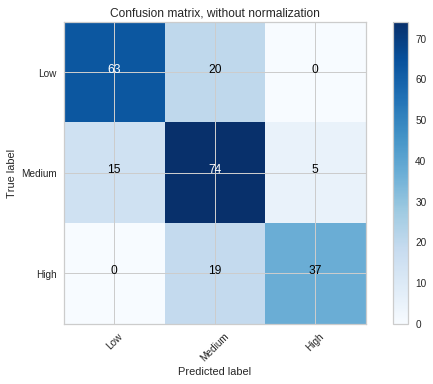

AUC for ADABoost: 0.7996933909511373


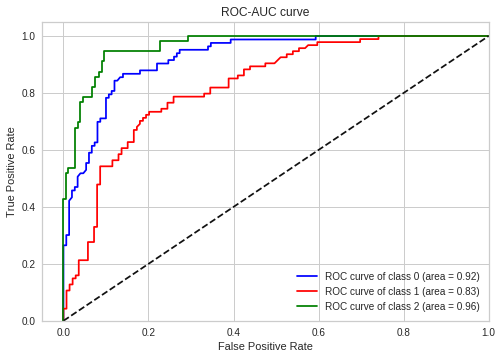

              precision    recall  f1-score   support

         Low       0.81      0.76      0.78        83
      Medium       0.65      0.79      0.71        94
        High       0.88      0.66      0.76        56

    accuracy                           0.75       233
   macro avg       0.78      0.74      0.75       233
weighted avg       0.76      0.75      0.75       233



KeyboardInterrupt: ignored

In [0]:
AdaBoost(X_train,y_train,X_test,y_test)

In [0]:
de1 = int(input("enter Value of de1 : "))
de2	= int(input("enter Value of de2 : "))
de3	= int(input("enter Value of de3 : "))
de4	= int(input("enter Value of de4 : "))
an1	= int(input("enter Value of an1 : "))
an2	= int(input("enter Value of an2 : "))
an3	= int(input("enter Value of an3 : "))
an4	= int(input("enter Value of an4 : "))
sl1	= int(input("enter Value of sl1 : "))
sl2	= int(input("enter Value of sl2 : "))
sl3	= int(input("enter Value of sl3 : "))
sl4	= int(input("enter Value of sl4 : "))

In [0]:
col=col[:-1]

In [0]:
output_data=[]
output_data.append(de1)
output_data.append(de2)
output_data.append(de3)
output_data.append(de4)
output_data.append(an1)
output_data.append(an2)
output_data.append(an3)
output_data.append(an4)
output_data.append(sl1)
output_data.append(sl2)
output_data.append(sl3)
output_data.append(sl4)

In [0]:
output_data=pd.DataFrame([output_data],columns = col)

In [0]:
#model_adaboostcnn = joblib.load('/content/gdrive/My Drive/Heart Disease/AdaBoost.pkl') 

In [0]:
#model_CNN = load_model('/content/gdrive/My Drive/CNN _ADABoost/CNN_Model.h5')
#od = output_data.to_numpy()
#od = od.reshape(od.shape[0], 12, 1).astype('float32')
#pred=model_CNN.predict_classes(od)
#print("Prediction for newly added data : ",pred)

In [0]:
model_stacking = joblib.load('/content/gdrive/My Drive/CNN _ADABoost/stacking.pkl') 
pred = model_stacking.predict(output_data)
print("Prediction for newly added data : ",pred)